In [1]:
import anvil.server

anvil.server.connect("server_JJLT3756U4JMBBGT7ZIVPRYB-KOUWLGWXX3TSFU4X")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1- Lodaing the *Data*

In [4]:
dataFream = pd.read_csv('/content/drive/MyDrive/DataSets/stc.csv')
len(dataFream)

1048575

In [5]:
dataFream.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [6]:
dataFream.shape
print(f" Number of rows: {dataFream.shape[0]}")
print(f" Number of columns: {len(dataFream.columns)}")
print(f" Names of Columns: {dataFream.columns}")

 Number of rows: 1048575
 Number of columns: 13
 Names of Columns: Index(['Column1', 'date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')


In [7]:
# display the frequencies for columns
dataFream.count()

Column1             1048575
date_               1048575
user_id_maped       1048575
program_name        1048575
duration_seconds    1048575
program_class       1048575
season              1048575
episode             1048575
program_desc        1034537
program_genre       1048575
series_title        1048575
hd                  1048575
original_name       1048575
dtype: int64

In [8]:
# descriptive statistics for data
dataFream.describe().T

,count,mean,std,min,25%,50%,75%,max
Column1,1048575.0,628172.999996,359704.056673,1.0,318066.0,630355.0,939822.5,1247852.0
user_id_maped,1048575.0,17092.655895,10035.130858,1.0,8253.0,17149.0,25665.0,34280.0
duration_seconds,1048575.0,1230.957212,6821.057889,2.0,52.0,119.0,1328.0,1461329.0
season,1048575.0,1.342139,2.104095,0.0,0.0,1.0,1.0,23.0
episode,1048575.0,6.157952,12.220155,0.0,0.0,1.0,9.0,282.0
series_title,1048575.0,0.012059,0.109150,0.0,0.0,0.0,0.0,1.0
hd,1048575.0,0.386273,0.486895,0.0,0.0,0.0,1.0,1.0


In [9]:
print('Known observations: {}\nUnique observations: {}'
      .format(len(dataFream.index),len(dataFream.drop_duplicates().index)))

Known observations: 1048575
Unique observations: 1048575


In [10]:
for col in dataFream.columns:
    print( col,':', dataFream[col].nunique() )
    #most 5 freq
    print(dataFream[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

Column1 : 1048575
1         1
837296    1
837280    1
837281    1
837282    1
Name: Column1, dtype: int64

********************

date_ : 411
4/21/2017    4512
4/22/2017    4411
3/17/2017    4260
3/20/2017    4250
3/18/2017    4241
Name: date_, dtype: int64

********************

user_id_maped : 11578
15538    2169
730      2167
20184    2164
33381    2156
16150    2155
Name: user_id_maped, dtype: int64

********************

program_name : 8270
The Boss Baby                           23625
Pingu                                   17063
Trolls                                  13609
The Adventures of Petey and Friends      9510
Moana                                    7521
Name: program_name, dtype: int64

********************

duration_seconds : 18958
6    14032
2    13131
4    12868
5    12598
3    12566
Name: duration_seconds, dtype: int64

********************

program_class : 2
SERIES/EPISODES    560174
MOVIE              488401
Name: program_class, dtype: int64

********************

In [11]:
dataFream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Column1           1048575 non-null  int64 
 1   date_             1048575 non-null  object
 2   user_id_maped     1048575 non-null  int64 
 3   program_name      1048575 non-null  object
 4   duration_seconds  1048575 non-null  int64 
 5   program_class     1048575 non-null  object
 6   season            1048575 non-null  int64 
 7   episode           1048575 non-null  int64 
 8   program_desc      1034537 non-null  object
 9   program_genre     1048575 non-null  object
 10  series_title      1048575 non-null  int64 
 11  hd                1048575 non-null  int64 
 12  original_name     1048575 non-null  object
dtypes: int64(7), object(6)
memory usage: 104.0+ MB


# 2- Data Cleaning

In [12]:
df = dataFream.copy()
df

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1247848,4/22/2017,23716,Extraterrestrial,4865,MOVIE,0,0,Horror MovieExtraterrestrial (HD),Horror,0,0,Extraterrestrial
1048571,1247849,11/29/2017,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy MovieThe One With The Holiday Armadillo...,Comedy,0,0,Friends
1048572,1247850,6/15/2017,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror MovieDreams In The Witch House,Horror,0,0,Masters of Horror
1048573,1247851,9/11/2017,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama MovieTwo Lovers and a Bear (HD),Drama,0,1,Two Lovers and a Bear


In [13]:
# Data Preprocessing on the input data
df = df.drop(columns=['Column1'])         # dropping the index column
df['program_name'] = df['program_name'].str.strip()  # trim spaces in movies names to avoid misspellings in input data
df['original_name'] = df['original_name'].str.strip()  # trim spaces in movies names to avoid misspellings in input data
df[['duration_seconds', 'season','episode','series_title','hd']] = df[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  # read numeric columns as numeric data types
df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) # read string columns as string data types

In [14]:
#column
# changing column names to lowercase
df.columns = df.columns.str.lower()

# remove underscores at the end of column names
df.columns = df.columns.str.rstrip('_')

# remove any numbers in column names
df.columns = df.columns.str.replace('\d+', '')

df.columns

<ipython-input-14-162916f68812>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('\d+', '')


Index(['date', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')

In [15]:
# Here we try to get the most watched movies (Total Views / Total Users Views / Total watch time)
# For series we concatenated the Session episode to differentiate between episodes
grouped=df.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'original_name'] = grouped['original_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['original_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['original_name','program_class','No_of_users_who_watched', 'No_of_watches', 'total_watch_time_in_seconds']
grouped['total_watch_time_in_houres']=grouped['total_watch_time_in_seconds']/3600
grouped = grouped.drop(columns=['total_watch_time_in_seconds'])
grouped.rename(columns = {'original_name': 'program_name_SE_EP'}, inplace = True)
grouped = grouped.sort_values(by=['total_watch_time_in_houres', 'No_of_watches','No_of_users_who_watched'], ascending=False).reset_index(drop=True)

In [16]:
grouped

,program_name_SE_EP,program_class,No_of_users_who_watched,No_of_watches,total_watch_time_in_houres
0,The Boss Baby,MOVIE,3389,24047,2961.350833
1,The Amazing pider-Man,MOVIE,1011,2877,1966.119167
2,The Expendables,MOVIE,853,2119,1961.159444
3,Moana,MOVIE,2173,8081,1706.176944
4,Trolls,MOVIE,2613,13793,1601.023056
...,...,...,...,...,...
11362,Mad Love,MOVIE,1,1,0.001111
11363,Al Akhwa A'adaa (T)_SE1_EP30,SERIES/EPISODES,1,1,0.000833
11364,Mumuhug_SE5_EP10,SERIES/EPISODES,1,1,0.000833
11365,Thomas And Friends_SE9_EP5,SERIES/EPISODES,1,1,0.000833


In [17]:
# Here we try to get the most watched movies (Total Views / Total Users Views / Total watch time)
# For series we concatenated the Session episode to differentiate between episodes
df.loc[df['program_class'] == 'SERIES/EPISODES', 'original_name'] = df['original_name']+'_SE'+df['season'].astype(str)+'_EP'+df['episode'].astype(str)
df['total_watch_time_in_houres'] = df['duration_seconds']/3600

In [18]:
df

,date,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,total_watch_time_in_houres
0,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets,0.011111
1,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana,0.004722
2,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,0.002222
3,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,0.021111
4,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill,0.024167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4/22/2017,23716,Extraterrestrial,4865,MOVIE,0,0,Horror MovieExtraterrestrial (HD),Horror,0,0,Extraterrestrial,1.351389
1048571,11/29/2017,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy MovieThe One With The Holiday Armadillo...,Comedy,0,0,Friends_SE7_EP10,0.350278
1048572,6/15/2017,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror MovieDreams In The Witch House,Horror,0,0,Masters of Horror_SE1_EP2,0.001667
1048573,9/11/2017,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama MovieTwo Lovers and a Bear (HD),Drama,0,1,Two Lovers and a Bear,0.020000


In [19]:
# remove columns
df.drop(columns=['program_desc', 'series_title', 'episode', 'season'], inplace=True)

In [20]:
#rename columns
df.rename(columns = {'original_name': 'program_name_SE_EP'}, inplace = True)

In [21]:
# convert integer columns to float, except for the first column
# get the column names and data types
cols = df.columns
types = df.dtypes
for i in range(len(cols)):
    if types[i] == 'int64':
        df[cols[i]] = df[cols[i]].astype('float64')

# print the data types of each column
print(df.dtypes)

date                           object
user_id_maped                  object
program_name                   object
duration_seconds              float64
program_class                  object
program_genre                  object
hd                            float64
program_name_SE_EP             object
total_watch_time_in_houres    float64
dtype: object


In [22]:
# count the number of null values in each column
print(df.isnull().sum())

date                          0
user_id_maped                 0
program_name                  0
duration_seconds              0
program_class                 0
program_genre                 0
hd                            0
program_name_SE_EP            0
total_watch_time_in_houres    0
dtype: int64


there is no missing data!

In [23]:
# Check for duplicates
df.duplicated().sum()

102447

#3- Data Exploration & Questions and answers

In [24]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,duration_seconds,hd,total_watch_time_in_houres
count,"1,048,575.00","1,048,575.00","1,048,575.00"
mean,"1,230.96",0.39,0.34
std,"6,821.06",0.49,1.89
min,2.00,0.00,0.00
25%,52.00,0.00,0.01
50%,119.00,0.00,0.03
75%,"1,328.00",1.00,0.37
max,"1,461,329.00",1.00,405.92


In [25]:
df.describe(include=['O'])

,date,user_id_maped,program_name,program_class,program_genre,program_name_SE_EP
count,1048575,1048575,1048575,1048575,1048575,1048575
unique,411,11578,8013,2,16,11367
top,4/21/2017,15538,The Boss Baby,SERIES/EPISODES,Animation,The Boss Baby
freq,4512,2169,24047,560174,401730,24047


## دراسة انماط المشاهدة المختلفة للمستخدمين وتحديد الفئة التي تشاهد  بالجودة القياسية SD -  مقابل فئة ال HD

0.00    643539
1.00    405036
Name: hd, dtype: int64


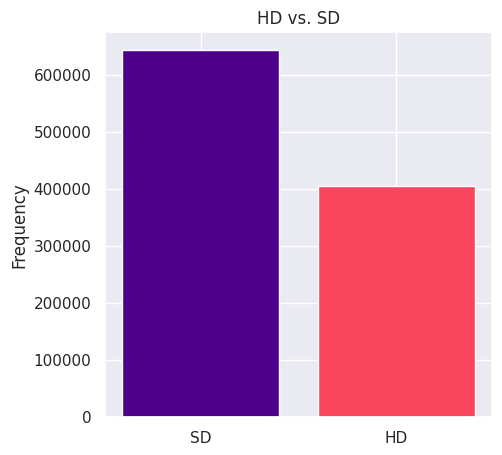

In [26]:
plt.figure(figsize=(5, 5))


# calculate the frequency of each value
counts = df['hd'].value_counts()

# create a bar chart
plt.bar(counts.index, counts.values, color=['#4E008C', '#F9455D'])

# add labels and title
plt.xticks([0, 1], ['SD', 'HD'])
plt.ylabel('Frequency')
plt.title('HD vs. SD')

# print the counts
print(counts)
# show the plot
plt.show()

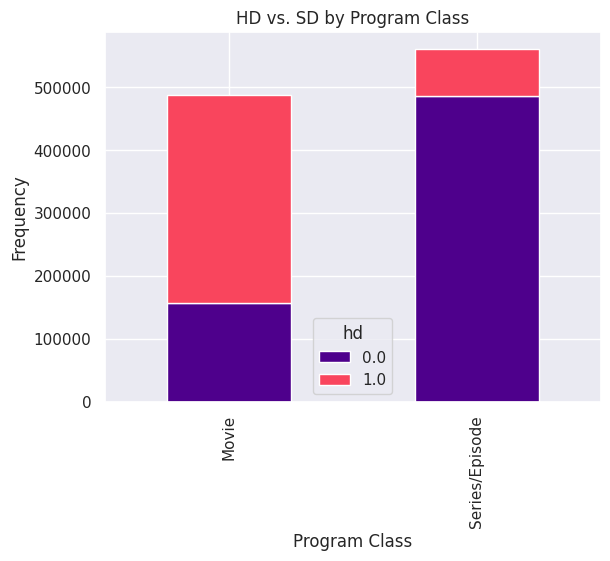

In [27]:
counts = df.groupby(['program_class', 'hd']).size().unstack()
counts.plot(kind='bar', stacked=True, color=['#4E008C', '#F9455D'])
plt.xlabel('Program Class')
plt.ylabel('Frequency')
plt.title('HD vs. SD by Program Class')
plt.xticks([0, 1], ['Movie', 'Series/Episode'])

plt.show()

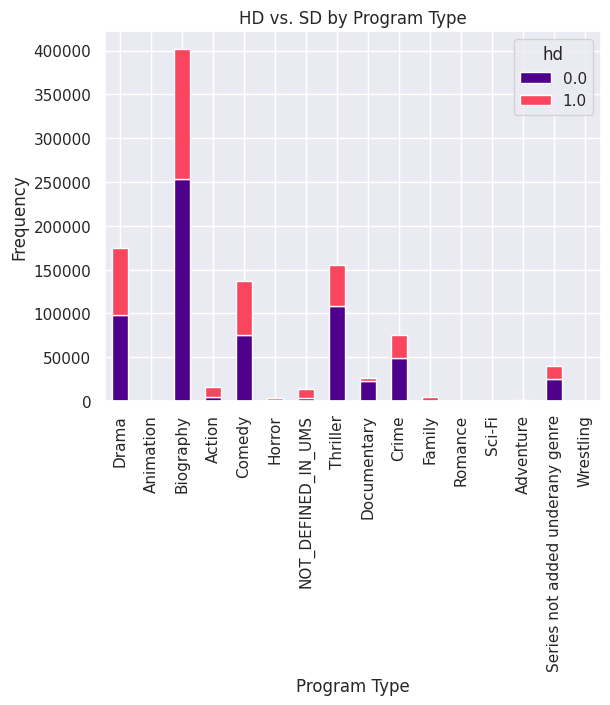

In [28]:
counts = df.groupby(['program_genre', 'hd']).size().unstack()
counts.plot(kind='bar', stacked=True, color=['#4E008C', '#F9455D'])
plt.xlabel('Program Type')
plt.ylabel('Frequency')
plt.title('HD vs. SD by Program Type')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ['Drama', 'Animation', 'Biography', 'Action', 'Comedy', 'Horror',
       'NOT_DEFINED_IN_UMS', 'Thriller', 'Documentary', 'Crime', 'Family',
       'Romance', 'Sci-Fi', 'Adventure',
       'Series not added underany genre', 'Wrestling'])
plt.savefig('hd-sd-by-program-type.png')
plt.show()

In [29]:
# plot top 10 Programs
fig = px.pie(grouped.head(10), values='total_watch_time_in_houres', names='program_name_SE_EP',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [30]:
# plot top 10 Programs
fig = px.pie(grouped.head(10), values='total_watch_time_in_houres', names='program_name_SE_EP',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [31]:
# plot نوع الافلام الاكثر تفضيلا (خربان)
#fig = px.pie(df[program_genre]), values='total_watch_time_in_houres', names='program_name_SE_EP',\
#            hover_data=['program_class'],title='top 10 programs in total watch time in houres')
#fig.show()

ضيفو اسئلة اكثر واعملولها رسومات

# 4- Data Processing

In [32]:
# Identify binary columns
binary_cols = [col for col in df.columns if len(df[col].unique()) == 2]
print("Binary columns:", binary_cols)

Binary columns: ['program_class', 'hd']


In [33]:
# print the unique values in a column
def print_unique_values(df, column):
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

def convert_binary_to_zero_one(df):
    # identify columns with two classes
    binary_cols = [col for col in df.columns if len(df[col].unique()) == 2]

# convert binary columns to 0 and 1
for col in binary_cols:
    unique_values = df[col].unique()
    if len(unique_values) == 2:
        df[col] = df[col].apply(lambda x: 1 if x == unique_values[1] else 0)


# 0 for MOVIE, 1 for SERIES/EPISODES
print_unique_values(df, 'program_class')

Unique values in program_class: [0 1]


In [34]:
df['program_genre'].unique()

array(['Drama', 'Animation', 'Biography', 'Action', 'Comedy', 'Horror',
       'NOT_DEFINED_IN_UMS', 'Thriller', 'Documentary', 'Crime', 'Family',
       'Romance', 'Sci-Fi', 'Adventure',
       'SERIES_NOT_ADDED_UNDER_ANY_GENRE', 'Wrestling'], dtype=object)

In [35]:
df.replace({'Drama': 0, 'Animation': 1, 'Biography': 2, 'Action': 3, 'Comedy': 4, 'Horror': 5,
             'NOT_DEFINED_IN_UMS': 6, 'Thriller': 7, 'Documentary': 8, 'Crime': 9, 'Family': 10, 'Romance': 11,
             'Sci-Fi': 12, 'Adventure': 13, 'SERIES_NOT_ADDED_UNDER_ANY_GENRE': 14, 'Wrestling': 15}, inplace=True)


In [36]:
# function to convert values to float
def convert_to(x, output_type=float):
  if x == ' ':
    return 0.0
  else:
    return output_type(x)

In [37]:
#convarte from string to float
#df['user_id_maped'] = df['user_id_maped'].apply(convert_to)
df['total_watch_time_in_houres'] = pd.to_numeric(df['total_watch_time_in_houres'], errors='coerce')

In [38]:
# calculate the correlation matrix
corr_matrix = df.corr()

# print the correlation matrix
print(corr_matrix)

                            duration_seconds  program_class  program_genre  \
duration_seconds                        1.00           0.06           0.00   
program_class                           0.06           1.00          -0.13   
program_genre                           0.00          -0.13           1.00   
hd                                     -0.05          -0.56           0.03   
total_watch_time_in_houres              1.00           0.06           0.00   

                              hd  total_watch_time_in_houres  
duration_seconds           -0.05                        1.00  
program_class              -0.56                        0.06  
program_genre               0.03                        0.00  
hd                          1.00                       -0.05  
total_watch_time_in_houres -0.05                        1.00  


<ipython-input-38-674f7a3b43e4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



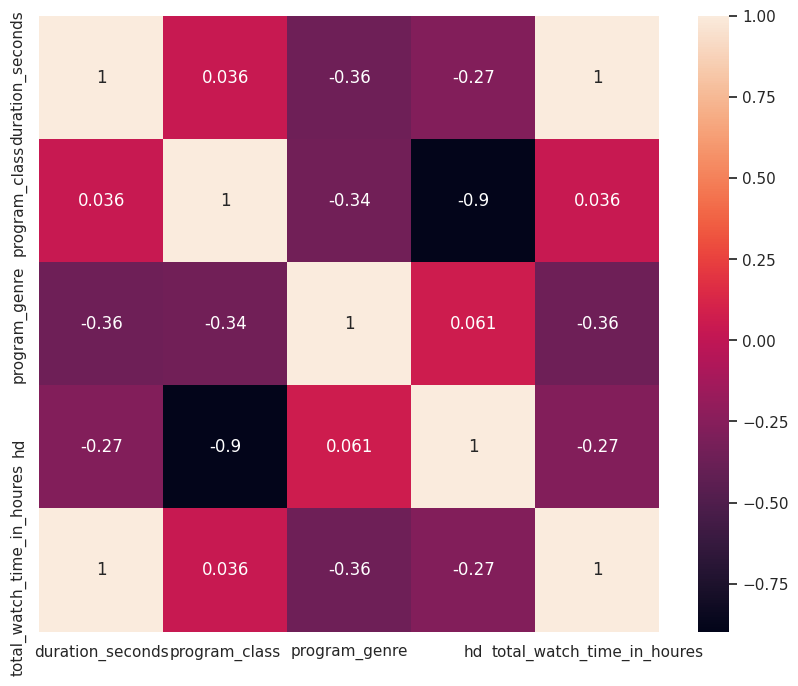

In [39]:
plt.figure(figsize=(10,8))
_=sns.heatmap(corr_matrix.corr(), annot = True)

In [40]:
df.head()

,date,user_id_maped,program_name,duration_seconds,program_class,program_genre,hd,program_name_SE_EP,total_watch_time_in_houres
0,5/27/2017,26138,100 treets,40.00,0,0,0,100 treets,0.01
1,5/21/2017,7946,Moana,17.00,0,1,1,Moana,0.00
2,8/10/2017,7418,The Mermaid Princess,8.00,0,1,1,The Mermaid Princess,0.00
3,7/26/2017,19307,The Mermaid Princess,76.00,0,1,1,The Mermaid Princess,0.02
4,7/7/2017,15860,Churchill,87.00,0,2,1,Churchill,0.02


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   date                        1048575 non-null  object 
 1   user_id_maped               1048575 non-null  object 
 2   program_name                1048575 non-null  object 
 3   duration_seconds            1048575 non-null  float64
 4   program_class               1048575 non-null  int64  
 5   program_genre               1048575 non-null  int64  
 6   hd                          1048575 non-null  int64  
 7   program_name_SE_EP          1048575 non-null  object 
 8   total_watch_time_in_houres  1048575 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 72.0+ MB


# 5- Normalization

In [42]:
scaler = MinMaxScaler()
#اتاكدو من الكولم يلي تحتاج نورملايزيشن غير دي كمان
df['duration_seconds'] = scaler.fit_transform(df['duration_seconds'].values.reshape(-1, 1))

# 6- Feature Engineering

- Average duration of programs viewed by a user


In [43]:
# Convert the duration_seconds column to a numeric type
df['duration_seconds'] = pd.to_numeric(df['duration_seconds'], errors='coerce')

# Group the  by user_id_maped and calculate summary statistics for duration_seconds
duration_stats = df.groupby('user_id_maped')['duration_seconds'].agg(['mean'])

# Convert the mean duration from seconds to minutes
duration_stats['mean'] = duration_stats['mean'] / 60

# Rename the columns of the new DataFrame
duration_stats.columns = ['duration_Min_Avg']

# Merge the new DataFrame with the original DataFrame
df = pd.merge(df, duration_stats, on='user_id_maped', how='left')

In [44]:
df.head(100)

,date,user_id_maped,program_name,duration_seconds,program_class,program_genre,hd,program_name_SE_EP,total_watch_time_in_houres,duration_Min_Avg
0,5/27/2017,26138,100 treets,0.00,0,0,0,100 treets,0.01,0.00
1,5/21/2017,7946,Moana,0.00,0,1,1,Moana,0.00,0.00
2,8/10/2017,7418,The Mermaid Princess,0.00,0,1,1,The Mermaid Princess,0.00,0.00
3,7/26/2017,19307,The Mermaid Princess,0.00,0,1,1,The Mermaid Princess,0.02,0.00
4,7/7/2017,15860,Churchill,0.00,0,2,1,Churchill,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...
95,3/18/2017,200,Why Did I Get Married Too?,0.00,0,4,1,Why Did I Get Married Too?,0.00,0.00
96,1/11/2018,26302,Kung Fu Panda: Legends Of Awesomeness,0.00,1,1,1,Kung Fu Panda: Legends Of Awesomeness_SE1_EP0,0.01,0.00
97,10/27/2017,26281,Going in tyle,0.00,0,4,1,Going in tyle,0.00,0.00
98,10/10/2017,3218,Melissa & Joey,0.00,1,4,1,Melissa & Joey_SE1_EP0,0.00,0.00


- Number of episodes watched for each user

In [45]:
# create a new column for the number of programs watched by each user
user_program_count = df.groupby('user_id_maped').size().reset_index(name='num_programs_watched')
df = pd.merge(df, user_program_count, on='user_id_maped', how='left')

In [46]:
#df['avg_duration'] = df.groupby('user_id_maped')['duration_seconds'].transform('mean')
#df['num_programs'] = df.groupby('user_id_maped')['program_name'].transform('count')

In [47]:
df.head()

,date,user_id_maped,program_name,duration_seconds,program_class,program_genre,hd,program_name_SE_EP,total_watch_time_in_houres,duration_Min_Avg,num_programs_watched
0,5/27/2017,26138,100 treets,0.00,0,0,0,100 treets,0.01,0.00,24
1,5/21/2017,7946,Moana,0.00,0,1,1,Moana,0.00,0.00,4
2,8/10/2017,7418,The Mermaid Princess,0.00,0,1,1,The Mermaid Princess,0.00,0.00,28
3,7/26/2017,19307,The Mermaid Princess,0.00,0,1,1,The Mermaid Princess,0.02,0.00,9
4,7/7/2017,15860,Churchill,0.00,0,2,1,Churchill,0.02,0.00,4


In [48]:
# calculate the correlation matrix
corr_matrix = df.corr()

# print the correlation matrix
print(corr_matrix)

<ipython-input-48-674f7a3b43e4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



                            duration_seconds  program_class  program_genre  \
duration_seconds                        1.00           0.06           0.00   
program_class                           0.06           1.00          -0.13   
program_genre                           0.00          -0.13           1.00   
hd                                     -0.05          -0.56           0.03   
total_watch_time_in_houres              1.00           0.06           0.00   
duration_Min_Avg                        0.30           0.20           0.02   
num_programs_watched                    0.00           0.35          -0.07   

                              hd  total_watch_time_in_houres  \
duration_seconds           -0.05                        1.00   
program_class              -0.56                        0.06   
program_genre               0.03                        0.00   
hd                          1.00                       -0.05   
total_watch_time_in_houres -0.05                       

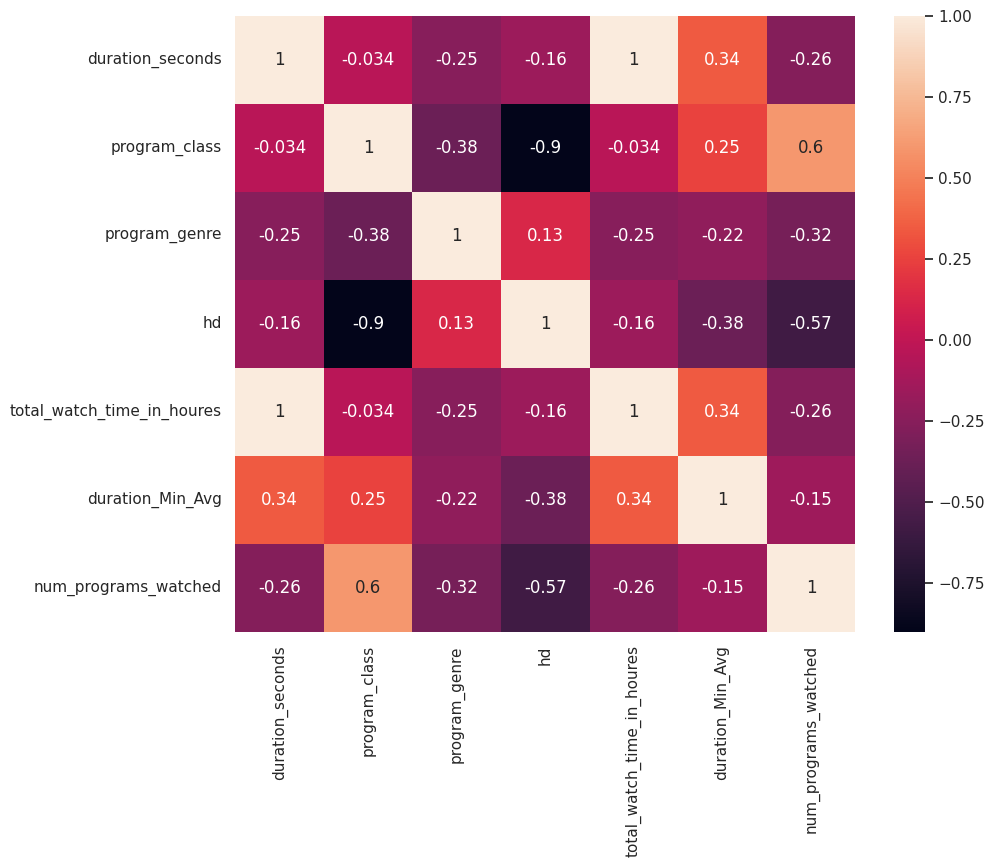

In [49]:
plt.figure(figsize=(10,8))
_=sns.heatmap(corr_matrix.corr(), annot = True)

In [50]:
# calculate the correlation matrix
corr_matrix = grouped.corr()

# print the correlation matrix
print(corr_matrix)

                            No_of_users_who_watched  No_of_watches  \
No_of_users_who_watched                        1.00           0.89   
No_of_watches                                  0.89           1.00   
total_watch_time_in_houres                     0.75           0.72   

                            total_watch_time_in_houres  
No_of_users_who_watched                           0.75  
No_of_watches                                     0.72  
total_watch_time_in_houres                        1.00  


<ipython-input-50-fbeb912a1e89>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



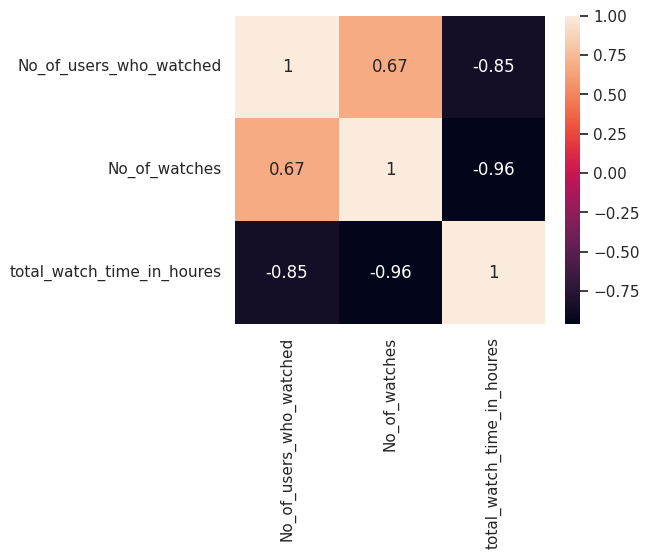

In [51]:
plt.figure(figsize=(5,4))
_=sns.heatmap(corr_matrix.corr(), annot = True)

# 7- Prediction

In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create columns for X (input) and y (output)
X = df[['program_genre', 'hd', 'program_class']]
y = df['total_watch_time_in_houres']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred)

# Print RMSE
print(rmse)

3.5726886356143557


In [53]:
inputs = {
    'program_genre': 8, # 'Drama': 0, 'Animation': 1, 'Biography': 2, 'Action': 3, 'Comedy': 4, 'Horror': 5,
                        # 'NOT_DEFINED_IN_UMS': 6, 'Thriller': 7, 'Documentary': 8, 'Crime': 9, 'Family': 10, 'Romance': 11,
                        # 'Sci-Fi': 12, 'Adventure': 13, 'SERIES_NOT_ADDED_UNDER_ANY_GENRE': 14, 'Wrestling': 15

    'hd': 0, # HD : 1, SD : 0

    'program_class': 1 # SERIES/EPISODES: 1, MOVIE: 0
}

input_data = pd.DataFrame([inputs])

prediction = model.predict(input_data)
format_float = "{:.2f}".format(prediction[0])
print(format_float,"% that ")


0.52 % that 


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instantiate the models
lr = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

# Train the models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Ensemble the models
ensemble = VotingRegressor(estimators=[('lr', lr), ('rf', rf), ('gb', gb)])

# Fit the ensemble to the training data
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred)
print(rmse)



3.961571258900812


In [55]:

inputs = {
    'program_genre': 8, # 'Drama': 0, 'Animation': 1, 'Biography': 2, 'Action': 3, 'Comedy': 4, 'Horror': 5,
                        # 'NOT_DEFINED_IN_UMS': 6, 'Thriller': 7, 'Documentary': 8, 'Crime': 9, 'Family': 10, 'Romance': 11,
                        # 'Sci-Fi': 12, 'Adventure': 13, 'SERIES_NOT_ADDED_UNDER_ANY_GENRE': 14, 'Wrestling': 15

    'hd': 0, # HD : 1, SD : 0

    'program_class': 1 # SERIES/EPISODES: 1, MOVIE: 0
}

input_data = pd.DataFrame([inputs])

prediction = ensemble.predict(input_data)
format_float = "{:.2f}".format(prediction[0])
print(format_float,"% that ")

0.54 % that 


In [56]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the input data using the scaler
input_data_scaled = scaler.transform(input_data)

# Make the prediction using the scaled input data
prediction_scaled = ensemble.predict(input_data_scaled)
format_float = "{:.2f}".format(prediction_scaled[0])
print(format_float, "% that")

0.33 % that


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



In [84]:
@anvil.server.callable
def predict_TH(p_class, p_gen, SD_HD):
    # Define input data as a dataframe
    input_data = pd.DataFrame({
        'program_genre': [p_gen],
        'hd': [SD_HD],
        'program_class': [p_class]
    })
    # Predict using the ensemble model
    prediction = ensemble.predict(input_data)
    format_float = "% {:.2f}".format(prediction[0]*100)
    # Return the predicted value
    return (format_float)

In [58]:
#anvil.server.wait_forever()

# **Clustering**

clustering was performed on a dataset of TV program features (such as program genre, HD quality, and program class) using the K-Means clustering algorithm. K-Means clustering is a popular clustering algorithm that works by iteratively assigning data points to clusters based on their proximity to the cluster centroids, which are the mean values of the data points in each cluster.

- كيف ممكن نستخدمها ؟ اعلانات\نظم التوصية
- او *Competitive Analysis*: The data on program genres and classes can be used to conduct competitive analysis and identify areas where the company can differentiate itself from its competitors. For example, if the data shows that a particular genre is underrepresented in the market, the company can focus on producing more content in that area to attract viewers.


In [59]:
df.columns

Index(['date', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'program_genre', 'hd', 'program_name_SE_EP',
       'total_watch_time_in_houres', 'duration_Min_Avg',
       'num_programs_watched'],
      dtype='object')

In [89]:
# Define a dictionary that maps the numerical values back to the original categories
genre_dict = {0: 'Drama', 1: 'Animation', 2: 'Biography', 3: 'Action', 4: 'Comedy', 5: 'Horror',
              6: 'NOT_DEFINED_IN_UMS', 7: 'Thriller', 8: 'Documentary', 9: 'Crime', 10: 'Family', 11: 'Romance',
              12: 'Sci-Fi', 13: 'Adventure', 14: 'SERIES_NOT_ADDED_UNDER_ANY_GENRE', 15: 'Wrestling'}

# Replace the numerical values with their original categories
df['program_genre'].replace(genre_dict, inplace=True)




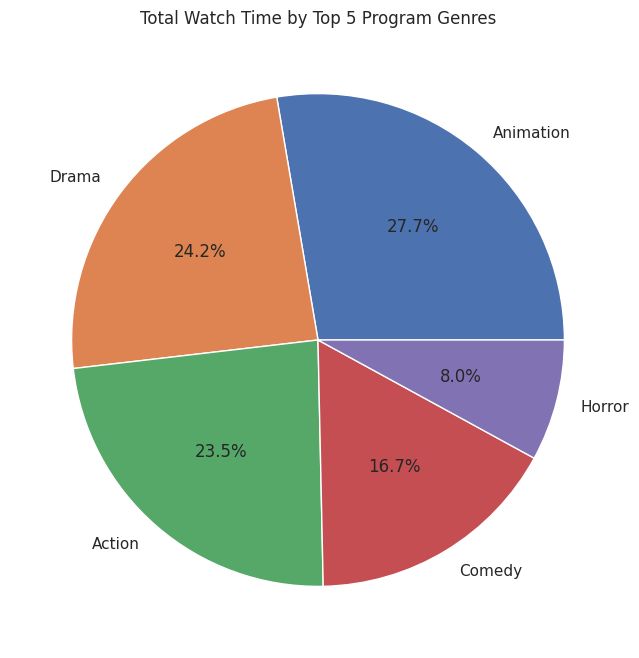

In [91]:
import matplotlib.pyplot as plt

# Group the data by program genre and aggregate the total watch time column using the sum function
total_watch_time = df.groupby('program_genre')['total_watch_time_in_houres'].sum()

# Sort the total watch time values in descending order and keep only the top 5 program genres
top_5_watch_time = total_watch_time.sort_values(ascending=False)[:5]

# Create a pie chart of the total watch time for the top 5 program genres
plt.figure(figsize=(10,8))
plt.pie(top_5_watch_time, labels=top_5_watch_time.index, autopct='%1.1f%%')
plt.title('Total Watch Time by Top 5 Program Genres')
plt.show()

In [61]:
from sklearn.cluster import KMeans

sampled_df = df[['program_genre', 'duration_Min_Avg', 'program_class',"num_programs_watched"]]

# Select the columns representing program preferences
preferences = sampled_df[['program_genre', 'program_class','duration_Min_Avg',"num_programs_watched"]]

# Convert categorical variables to numerical using one-hot encoding
preferences = pd.get_dummies(preferences)

# Normalize the data
preferences = (preferences - preferences.mean()) / preferences.std()

# Run K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(preferences)

# Add a new column to the original data with the cluster labels
sampled_df["cluster"] = kmeans.labels_

# Print the number of users in each cluster
print(sampled_df["cluster"].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1    450368
0    382093
2    216114
Name: cluster, dtype: int64


<ipython-input-61-84325fab145f>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



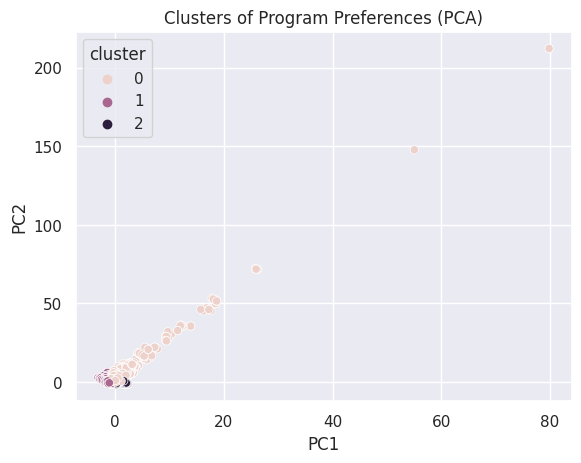

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
preferences_pca = pca.fit_transform(preferences)

# Add the cluster labels to the PCA-transformed data
preferences_pca = pd.DataFrame(preferences_pca, columns=["PC1", "PC2"])
preferences_pca["cluster"] = kmeans.labels_

# Visualize the clusters in a scatter plot
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=preferences_pca)
plt.title("Clusters of Program Preferences (PCA)")
plt.show()

In [ ]:
# Define a dictionary that maps the numerical values back to the original categories
genre_dict = {0: 'Drama', 1: 'Animation', 2: 'Biography', 3: 'Action', 4: 'Comedy', 5: 'Horror',
              6: 'NOT_DEFINED_IN_UMS', 7: 'Thriller', 8: 'Documentary', 9: 'Crime', 10: 'Family', 11: 'Romance',
              12: 'Sci-Fi', 13: 'Adventure', 14: 'SERIES_NOT_ADDED_UNDER_ANY_GENRE', 15: 'Wrestling'}

# Replace the numerical values with their original categories
sampled_df['program_genre'].replace(genre_dict, inplace=True)

# Define a dictionary that maps the numerical values back to the original categories
hd_dict = {0: 'SD', 1: 'HD'}

# Replace the numerical values with their original categories
sampled_df['hd'].replace(hd_dict, inplace=True)

# Define a dictionary that maps the numerical values back to the original categories
class_dict = {0: 'MOVIE', 1: 'SERIES/EPISODES'}

# Replace the numerical values with their original categories
sampled_df['program_class'].replace(class_dict, inplace=True)


In [ ]:
import matplotlib.pyplot as plt

# Compute the count of each feature in each cluster
cluster_program_genre = sampled_df.groupby(["cluster", "program_genre"]).size().reset_index(name='count_genre')
cluster_hd = sampled_df.groupby(["cluster", "hd"]).size().reset_index(name='count_hd')
cluster_program_class = sampled_df.groupby(["cluster", "program_class"]).size().reset_index(name='count_class')

# Create a bar chart for the count of each program genre in each cluster
for i in range(len(sampled_df["cluster"].unique())):
    cluster_data = cluster_program_genre[cluster_program_genre["cluster"] == i]
    plt.figure(figsize=(20, 6))
    plt.bar(cluster_data["program_genre"], cluster_data["count_genre"], color='purple')
    plt.title("Cluster {} - Program Genre".format(i), fontsize=12)
    plt.xlabel("Program Genre", fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

# Create a bar chart for the count of each HD quality in each cluster
for i in range(len(sampled_df["cluster"].unique())):
    cluster_data = cluster_hd[cluster_hd["cluster"] == i]
    plt.figure(figsize=(12, 6))
    plt.bar(cluster_data["hd"], cluster_data["count_hd"], color='purple')
    plt.title("Cluster {} - HD Quality".format(i), fontsize=12)
    plt.xlabel("HD Quality", fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

# Create a bar chart for the count of each program class in each cluster
for i in range(len(sampled_df["cluster"].unique())):
    cluster_data = cluster_program_class[cluster_program_class["cluster"] == i]
    plt.figure(figsize=(12, 6))
    plt.bar(cluster_data["program_class"], cluster_data["count_class"], color='purple')
    plt.title("Cluster {} - Program Class".format(i), fontsize=12)
    plt.xlabel("Program Class", fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()